# Modeling

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('modeling_data.csv')

In [3]:
data = data.drop(columns=['Unnamed: 0','log_date','log_time'])

In [5]:
import seaborn as sns

<AxesSubplot:>

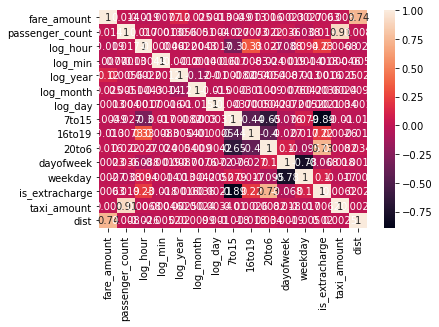

In [6]:
sns.heatmap(data.corr(), annot=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1000000 non-null  float64
 1   passenger_count  1000000 non-null  int64  
 2   log_hour         1000000 non-null  int64  
 3   log_min          1000000 non-null  int64  
 4   log_year         1000000 non-null  int64  
 5   log_month        1000000 non-null  int64  
 6   log_day          1000000 non-null  int64  
 7   7to15            1000000 non-null  int64  
 8   16to19           1000000 non-null  int64  
 9   20to6            1000000 non-null  int64  
 10  dayofweek        1000000 non-null  int64  
 11  weekday          1000000 non-null  int64  
 12  is_extracharge   1000000 non-null  int64  
 13  taxi_amount      1000000 non-null  int64  
 14  dist             1000000 non-null  float64
dtypes: float64(2), int64(13)
memory usage: 114.4 MB


In [7]:
data.head()

,fare_amount,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,4.5,1,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,16.9,1,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,5.7,2,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,7.7,1,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,5.3,1,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592


In [9]:
data_train = data.drop(columns=['log_hour','log_min','log_month','log_day','7to15','16to19','20to6','dayofweek'])

In [11]:
x_train = data_train.iloc[:,data_train.columns!='fare_amount']
y_train = data_train['fare_amount'].values

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.2,random_state=10)

In [14]:
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(800000, 5)
(200000, 5)
(800000,)
(200000,)


In [15]:
y_train

array([ 7.3 ,  7.7 ,  8.  , ..., 34.83, 25.  , 10.9 ])

lgbm

In [16]:
import lightgbm as lgbm

In [17]:
train_set = lgbm.Dataset(x_train, y_train, silent=True)
train_set

In [20]:
lgb = lgbm.LGBMRegressor()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15], 'max_depth':[-1,5,10,20],'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}


In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
clf = RandomizedSearchCV(lgb,parameters,n_iter=20)
clf.fit(X=x_train, y=y_train)
print(clf.best_params_)

{'reg_alpha': 0.01, 'num_leaves': 100, 'min_child_samples': 10, 'max_depth': 5, 'learning_rate': 0.1}


In [35]:
params ={'reg_alpha': 0.01, 'num_leaves': 50,  'max_depth': 5, 'learning_rate': 0.1}

In [36]:
model_lgbm = lgbm.train(params=params, train_set = train_set, num_boost_round=300)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 5
[LightGBM] [Info] Start training from score 11.335730
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [37]:
pred_test_y = model_lgbm.predict(x_valid)

In [38]:
pred_test_y

array([31.14567431,  7.16733951,  7.13482467, ..., 13.50537064,
        7.61022721, 13.06368557])

random_forest

In [55]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.ensemble import RandomForestRegressor


In [50]:
param_grid=[{'n_estimators':[5,10,15],'max_depth' : [6, 8, 10, 12]}]

In [53]:
rf_clf = RandomForestRegressor(random_state = 0, n_jobs = -1)

In [56]:
grid_cv = GridSearchCV(rf_clf, param_grid = param_grid, cv = 3, n_jobs = -1)

In [58]:
grid_cv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [6, 8, 10, 12],
                          'n_estimators': [5, 10, 15]}])

In [59]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'n_estimators': 15}
최고 예측 정확도: 0.7036


In [60]:
params={'max_depth': 8, 'n_estimators': 15}

In [63]:
rf_clf = RandomForestRegressor(random_state = 0, max_depth= 8, n_estimators= 15, n_jobs = -1)

In [65]:
rf_clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=15, n_jobs=-1, random_state=0)

In [67]:
from sklearn.metrics import mean_absolute_error

In [68]:
pred = rf_clf.predict(x_valid)
mean_absolute_error(pred, y_valid)

2.907101704883073

## test 예측

In [88]:
test_2 =  pd.read_csv('test_modeling.csv')

In [89]:
test_2

,Unnamed: 0,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,1,13,8,2015,1,27,1,0,0,2,1,0,1,1094.593298
1,1,1,13,8,2015,1,27,1,0,0,2,1,0,1,1474.196242
2,2,1,11,53,2011,10,8,1,0,0,6,0,0,1,357.075676
3,3,1,21,12,2012,12,1,0,0,1,6,0,1,1,1150.115807
4,4,1,21,12,2012,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,9909,6,12,37,2015,5,10,1,0,0,7,0,0,2,1484.303484
9910,9910,6,17,5,2015,1,12,0,1,0,1,1,1,2,1843.581309
9911,9911,6,20,44,2015,4,19,0,0,1,7,0,1,2,22663.426643
9912,9912,6,1,5,2015,1,31,0,0,1,6,0,1,2,5567.288310


In [91]:
test_2 = test_2.drop(columns=['Unnamed: 0','log_hour','log_min','log_month','log_day','7to15','16to19','20to6','dayofweek','weekday'])

In [92]:
pred_test_rf_2 = rf_clf.predict(test_2)

In [96]:
test_index['fare_amount'] = pred_test_rf_2

In [97]:
test_index.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.419431
1,2015-01-27 13:08:24.0000003,9.319614
2,2011-10-08 11:53:44.0000002,5.457094
3,2012-12-01 21:12:12.0000002,7.590777
4,2012-12-01 21:12:12.0000003,11.687276


In [98]:
test_index.to_csv('sub_4.csv', index=False) #4.6

##### LGBM

In [99]:
pred_test_lgbm = model_lgbm.predict(test_2)

In [100]:
test_index['fare_amount'] = pred_test_lgbm

In [101]:
test_index.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.443143
1,2015-01-27 13:08:24.0000003,9.467838
2,2011-10-08 11:53:44.0000002,5.304080
3,2012-12-01 21:12:12.0000002,7.546899
4,2012-12-01 21:12:12.0000003,11.619264


In [102]:
test_index.to_csv('sub_5.csv', index=False) #4.7